In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib as plt

In [ ]:
from google.colab import drive
drive.mount('/content/GoogleDrive/')


Mounted at /content/GoogleDrive/


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/GoogleDrive/MyDrive/Machine Learning on Google Collab/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2885 files belonging to 15 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
len(dataset)

91

In [ ]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0].numpy()) #.numpy will convert Tensor to Numpy
  # print(label_batch.numpy())

[[[172. 176. 175.]
  [173. 177. 176.]
  [175. 179. 178.]
  ...
  [176. 177. 172.]
  [174. 175. 170.]
  [172. 173. 168.]]

 [[171. 175. 174.]
  [172. 176. 175.]
  [174. 178. 177.]
  ...
  [175. 176. 171.]
  [173. 174. 169.]
  [172. 173. 168.]]

 [[170. 174. 173.]
  [172. 176. 175.]
  [174. 178. 177.]
  ...
  [174. 175. 170.]
  [173. 174. 169.]
  [173. 174. 169.]]

 ...

 [[ 95.  95.  95.]
  [ 94.  94.  94.]
  [ 94.  94.  94.]
  ...
  [117. 114. 107.]
  [116. 113. 106.]
  [117. 114. 107.]]

 [[ 96.  96.  96.]
  [ 95.  95.  95.]
  [ 94.  94.  94.]
  ...
  [115. 112. 105.]
  [118. 115. 108.]
  [120. 117. 110.]]

 [[100. 100. 100.]
  [ 98.  98.  98.]
  [ 96.  96.  96.]
  ...
  [114. 111. 104.]
  [119. 116. 109.]
  [123. 120. 113.]]]


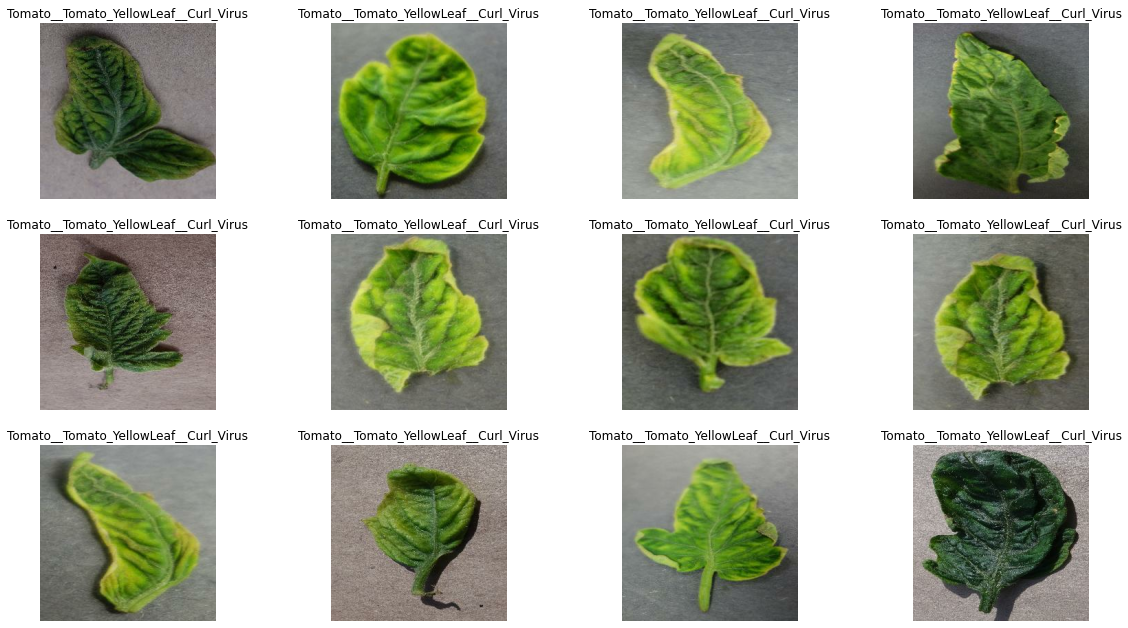

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,11)) #Area increased to 10 by 10
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1) #3 by 5 matrix of images
    plt.imshow(image_batch[i].numpy().astype('uint8')) #plt.imshow expects a 3D array i.e image_batch
    plt.title(class_names[label_batch[i]])
    plt.axis('off') #Turning the axis off


  # print(image_batch[0].shape)

In [ ]:
epochs = 50

In [ ]:
# 80% train and 20% (test + validation)

In [ ]:
train_size=0.8
len(dataset)*train_size

72.8

In [ ]:
train_ds = dataset.take(72)
len(train_ds)

72

In [ ]:
# Skipping first 72 and getting remaining 72
test_ds = dataset.skip(72)
len(test_ds)

19

In [ ]:
val_size = 0.1 #Validation size
len(dataset)*val_size

9.1

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

13

In [ ]:

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

72

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) #If you use Cache and Prefetch you save time
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
# Data Preprocessing
# Data Augmentation is done to address Overfitting
# This also ensures that if the dataset is rotated, the model will still be able to predict
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])


In [ ]:
# Building a CNN (Convulutionary Neural Network)



In [ ]:
# CNN is given below sample

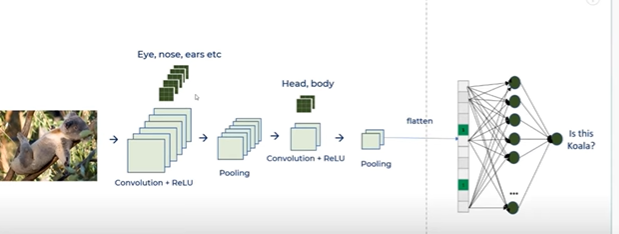

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 13

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=6,
)

Epoch 1/6
72/72 [==============================] - 289s 4s/step - loss: 0.1458 - accuracy: 0.9794 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/6
72/72 [==============================] - 271s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/6
72/72 [==============================] - 270s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/6
72/72 [==============================] - 270s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/6
72/72 [==============================] - 270s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/6
72/72 [==============================] - 270s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:

scores = model.evaluate(test_ds)

10/10 [==============================] - 16s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
scores

[0.0, 1.0]

In [ ]:
history.params

{'verbose': 1, 'epochs': 6, 'steps': 72}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

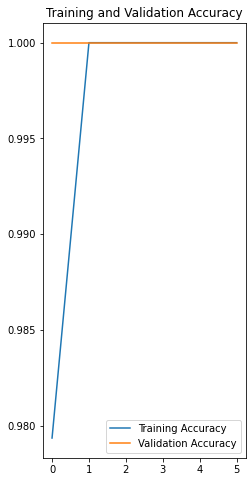

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(6),acc,label='Training Accuracy')
plt.plot(range(6),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

First image to predict
First image actual label Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 [==============================] - 1s 979ms/step
Predicted Label :  Tomato__Tomato_YellowLeaf__Curl_Virus


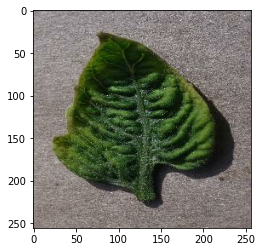

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print('First image to predict')
  plt.imshow(first_image)
  print("First image actual label",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("Predicted Label : ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #Array of Images
  img_array = tf.expand_dims(img_array,0) #Creating a batch

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence
  

1/1 [==============================] - 0s 51ms/step


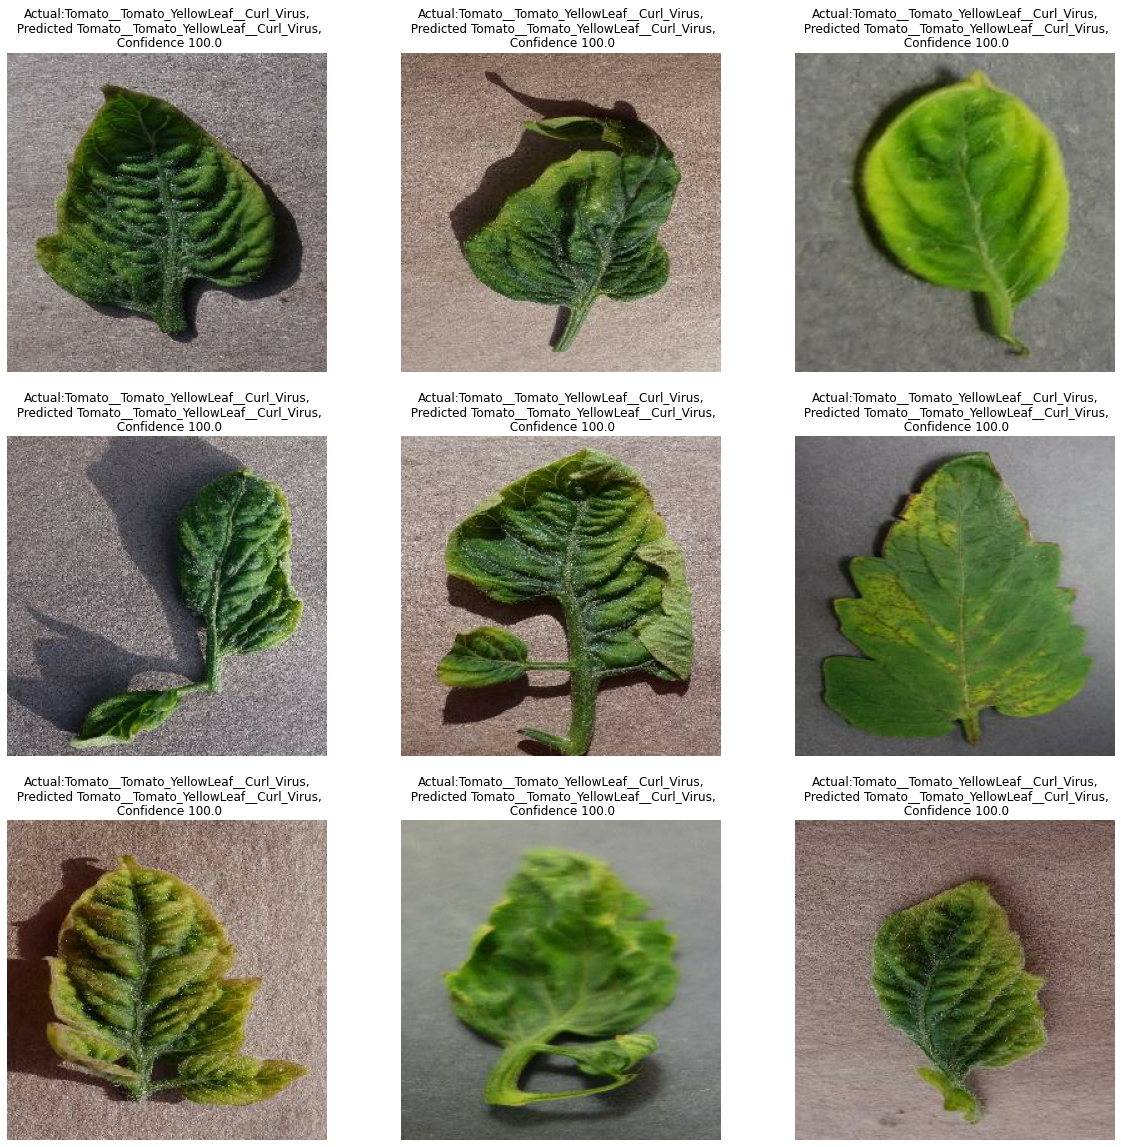

In [ ]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,1+i)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted {predicted_class},\n Confidence {confidence}")
    plt.axis("off")

In [ ]:
dir


<function dir>